In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


file_path = '/content/drive/MyDrive/cytoauto/Levine_32dim_notransform.csv'
df = pd.read_csv(file_path)
df.head()
df_original=df
df.columns


Index(['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19',
       'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Time','file_number', 'event_number'])

len(df.columns)


38

In [ ]:
import numpy as np
import pandas as pd

def create_corrupted_data(data, keep_probability=0.4):
    print("Original Data (x):\n", data)

    m = np.random.binomial(1, keep_probability, size=data.shape)
    print("\nBinary Mask (m):\n", m)

    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = data.iloc[shuffled_rows].reset_index(drop=True)
    print("\nShuffled Data (x_shuffled):\n", x_shuffled)


    x_corrupted = data * (1 - m) + x_shuffled * m
    print("\nCorrupted Data (x_corrupted):\n", x_corrupted)

    return x_corrupted

# Sample data
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
})

# Call the function
corrupted_data = create_corrupted_data(data, keep_probability=0.6)


Original Data (x):
    A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20

Binary Mask (m):
 [[1 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [1 1 0 1]
 [0 1 1 0]]

Shuffled Data (x_shuffled):
    A   B   C   D
0  4   9  14  19
1  5  10  15  20
2  1   6  11  16
3  2   7  12  17
4  3   8  13  18

Corrupted Data (x_corrupted):
    A  B   C   D
0  4  6  14  16
1  2  7  15  20
2  3  6  13  18
3  2  7  14  17
4  5  8  13  20


In [ ]:
corrupted_data = create_corrupted_data(df, keep_probability=0.4)

corrupted_data.head()

Original Data (x):
         Cell_length         DNA1         DNA2     CD45RA     CD133      CD19  \
0                22   201.783295   253.016647   0.817049 -0.147947 -0.033482   
1                35   191.828598   308.869080   3.801385 -0.191446 -0.083274   
2                32   116.111923   200.839218   3.204439 -0.161106  0.369613   
3                29   176.248505   313.022461   2.237382 -0.138071 -0.088311   
4                25   133.332779   226.467758  -0.044047 -0.151509  0.402548   
...             ...          ...          ...        ...       ...       ...   
265622           41  2305.191162  3131.641357  10.345075 -0.095875 -0.278241   
265623           45  2217.376953  3198.114258   0.585101 -0.281215 -0.044320   
265624           41  2455.673340  3157.416260   3.698715 -0.031322 -0.130569   
265625           39  2395.883789  3167.325439   1.463955 -0.056550 -0.244025   
265626           41  2450.653320  3113.955078   1.843143  0.644794 -0.034668   

            CD22   

,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,CD8,...,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,label,individual
0,25,201.783295,253.016647,2.993771,1.629902,0.748079,0.332183,-0.045922,3.237692,2.719878,...,-0.163008,-0.014681,0.265375,2.193749,12.734092,8.300448,-0.009804,3.474168,1.0,1
1,35,191.828598,132.122269,3.801385,0.050931,-0.175345,-0.122067,4.494379,-0.177158,-0.157742,...,-0.217398,8.089547,0.448901,0.995556,2.558165,0.726602,4.905976,2.956692,NaN,1
2,41,173.740433,350.834839,17.069796,3.977271,0.369613,9.562130,4.011197,1.773855,-0.028160,...,-0.041693,1.299899,-0.205549,33.025459,8.574364,-0.054804,-0.052067,9.166084,1.0,1
3,29,176.248505,313.022461,2.237382,2.203466,-0.088311,-0.220430,22.965115,-0.095335,0.280690,...,0.302398,3.398438,0.332596,6.956663,0.772103,-0.067247,-0.130211,-0.132632,NaN,1
4,25,133.332779,1780.423462,7.130833,-0.057386,0.402548,-0.172342,6.742060,2.906627,0.156578,...,0.688083,0.847043,0.189972,0.909562,0.993077,0.381205,-0.202496,-0.173065,NaN,1


In [ ]:
keep_probability=0.4
df_corrupted = np.random.binomial(1, keep_probability, size=df.shape)
print("\nBinary Mask (m):\n", df_corrupted)
mask_new = 1*(df!=df_corrupted)
print("\n New Binary Mask (m):\n",mask_new)


Binary Mask (m):
 [[0 1 1 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 1 1]]

 New Binary Mask (m):
         Cell_length  DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  \
0                 1     1     1       1      1     1     1      1    1    1   
1                 1     1     1       1      1     1     1      1    1    1   
2                 1     1     1       1      1     1     1      1    1    1   
3                 1     1     1       1      1     1     1      1    1    1   
4                 1     1     1       1      1     1     1      1    1    1   
...             ...   ...   ...     ...    ...   ...   ...    ...  ...  ...   
265622            1     1     1       1      1     1     1      1    1    1   
265623            1     1     1       1      1     1     1      1    1    1   
265624            1     1     1       1      1     1     1      1    1    1   
265625            1     1     1       1      1 

In [ ]:

df_labeled = df[df['label'].notna()]
df_unlabeled = df[df['label'].isna()]


x_labeled = df_labeled.drop(columns=['label'])
y_labeled = df_labeled['label']

x_unlabeled = df_unlabeled.drop(columns=['label'])
#y_unlabeled = df_unlabeled['label']


print("Labeled Features (x_labeled):\n", x_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nLabeled Target (y_labeled):\n", y_labeled)

#print("\nUnlabeled Target (y_unlabeled):\n", y_unlabeled)


Labeled Features (x_labeled):
         Cell_length         DNA1         DNA2    CD45RA     CD133       CD19  \
0                22   201.783295   253.016647  0.817049 -0.147947  -0.033482   
1                35   191.828598   308.869080  3.801385 -0.191446  -0.083274   
2                32   116.111923   200.839218  3.204439 -0.161106   0.369613   
3                29   176.248505   313.022461  2.237382 -0.138071  -0.088311   
4                25   133.332779   226.467758 -0.044047 -0.151509   0.402548   
...             ...          ...          ...       ...       ...        ...   
104179           58  2308.310303  3518.157471 -0.000532 -0.153228   9.874423   
104180           55  1997.182739  3237.193604  3.747007 -0.186719  12.390443   
104181           40  2509.493408  3193.563232 -0.184019 -0.072385  12.375916   
104182           48  2031.685425  3032.251953  1.568744  0.379171  10.129170   
104183           64  1764.721802  2972.677002  2.716329  0.487051   8.959737   

        

In [ ]:
from sklearn.model_selection import train_test_split

# Split labeled data into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display the results

print("Training Features (x_train):\n", x_train.shape)
print("\nTraining Target (y_train):\n", y_train.shape)
print("\nTesting Features (x_test):\n", x_test.shape)
print("\nTesting Target (y_test):\n", y_test.shape)

print("Training Features (x_train):\n", x_train)
print("\nTraining Target (y_train):\n", y_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTesting Target (y_test):\n", y_test)



Training Features (x_train):
 (72928, 37)

Training Target (y_train):
 (72928,)

Testing Features (x_test):
 (31256, 37)

Testing Target (y_test):
 (31256,)
Training Features (x_train):
         Cell_length         DNA1         DNA2    CD45RA     CD133       CD19  \
64113            25   123.413055   247.264938  5.697453  1.537298   0.776895   
82744            31  1824.911621  2485.373047  2.224972 -0.264615  -0.188495   
24294            41    86.404358   217.855179  1.931000  1.104188   1.239756   
7820             38   185.181335   329.612823  1.003372  0.504241  -0.129074   
43295            26   160.022964   322.868805  4.651943  0.963454  18.185394   
...             ...          ...          ...       ...       ...        ...   
54886            15   147.025452   288.088531  2.226745  1.153808  -0.057169   
76820            33  1809.336670  2436.716309  3.425539 -0.220359  -0.068687   
103694           43  2071.823975  2972.875732  1.556306 -0.131712  19.577427   
860          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

def logistic_with_loss(x_train, y_train, x_test, y_test):

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    log_reg = LogisticRegression(random_state=42, max_iter=500)
    log_reg.fit(x_train_scaled, y_train)


    probabilities = log_reg.predict_proba(x_test_scaled)


    loss = log_loss(y_test, probabilities)

    return probabilities, loss


log_reg_probs, log_reg_loss = logistic_with_loss(x_train, y_train, x_test, y_test)


print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression \n", log_reg_loss)


Logistic Regression Probabilities:
 [[1.01554047e-11 8.26768856e-14 1.89839594e-13 ... 7.26696963e-15
  1.75774023e-13 1.44977336e-12]
 [1.73637806e-27 9.19322605e-25 1.57089131e-21 ... 1.17487214e-12
  2.62416033e-04 6.75285133e-09]
 [7.89834160e-11 1.11253879e-10 2.68824403e-11 ... 2.57035510e-11
  1.16335174e-03 4.25974653e-08]
 ...
 [1.09388863e-11 1.81360671e-09 1.05337025e-08 ... 3.25740252e-17
  2.64939955e-13 9.52560657e-17]
 [2.31871101e-09 1.75469771e-05 1.45409007e-06 ... 4.43022386e-10
  8.04397549e-04 1.12300540e-05]
 [1.13762213e-06 6.95124566e-04 1.23782753e-05 ... 1.47937901e-11
  3.72405266e-04 1.96000578e-09]]

Logistic Regression 
 0.030309069745740946


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgboost_with_loss(x_train, y_train, x_test, y_test):

    y_train_adjusted = y_train - 1
    y_test_adjusted = y_test - 1


    xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_clf.fit(x_train, y_train_adjusted)


    probabilities = xgb_clf.predict_proba(x_test)
    loss = log_loss(y_test_adjusted, probabilities)

    return probabilities, loss

xgb_probs, xgb_log_loss = xgboost_with_loss(x_train, y_train, x_test, y_test)

# Displaying the results
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)



XGBoost Probabilities:
 [[5.2870575e-07 5.5549259e-07 4.4547227e-07 ... 8.4330856e-07
  8.0272923e-07 6.2187780e-07]
 [8.2367842e-07 1.8141062e-06 6.8722528e-07 ... 1.0766731e-06
  1.7258326e-05 2.1068540e-06]
 [5.5205066e-07 8.6178414e-07 5.8480362e-07 ... 1.0324942e-06
  4.2642719e-06 9.2441218e-07]
 ...
 [6.5520271e-07 4.6091463e-06 9.3846472e-07 ... 5.8767739e-07
  5.1200971e-07 4.5345195e-07]
 [2.7839903e-06 3.2294638e-06 2.5266534e-06 ... 4.5210136e-06
  1.0395867e-05 3.4572942e-05]
 [8.4335568e-07 7.6935595e-07 6.7999758e-07 ... 6.8546416e-07
  3.8635189e-06 9.1242248e-07]]

XGBoost Log Loss:
 0.00394913549174777


In [ ]:
import numpy as np
import pandas as pd

def binary_mask(p_m, x_unlabeled):

    mask = np.random.binomial(1, p_m, size=x_unlabeled.shape)
    return mask

def corruption(mask, x_unlabeled):

    num_rows = x_unlabeled.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = x_unlabeled.iloc[shuffled_rows].reset_index(drop=True)


    x_corrupted = x_unlabeled * (1 - mask) + x_shuffled * mask
    return x_corrupted


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    dimension = x_unlabeled.shape[1]

    input_layer = Input(shape=(dimension,))

    # Hidden layer
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Mask estimation output
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Feature estimation output
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Define the model
    model = Model(inputs=input_layer, outputs=[output1, output2])

    model.compile(
        optimizer='rmsprop',
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha}
    )

    # Ensure data is in the form of NumPy arrays
    x_unlabeled_np = x_unlabeled.to_numpy() if isinstance(x_unlabeled, pd.DataFrame) else x_unlabeled
    corruption_binary_mask = binary_mask(p_m, x_unlabeled_np)
    corrupted_data = corruption(corruption_binary_mask, pd.DataFrame(x_unlabeled_np)).to_numpy()

    # Train the model with correct output names
    model.fit(
        corrupted_data,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled_np},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model

# Scale the unlabeled data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.5  # Masking probability
alpha = 1.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50               # Number of epochs for training
}

# Run self-supervised training
encoder, model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Epoch 1/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: 0.7096 - loss: 1.6946 - mask_estimation_loss: 0.9851
Epoch 2/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6952 - loss: 1.5650 - mask_estimation_loss: 0.8698
Epoch 3/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6942 - loss: 1.5586 - mask_estimation_loss: 0.8644
Epoch 4/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6939 - loss: 1.5929 - mask_estimation_loss: 0.8990
Epoch 5/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.6937 - loss: 1.5593 - mask_estimation_loss: 0.8655
Epoch 6/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.6937 - loss: 1.5591 - mask_estimation_loss: 0.8654
Epoch 7/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: 0.6937 - loss: 1.5472 - mask_estimation_loss: 0.8534
Epoch 8/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - featur

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 37)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 37)             │          1,406 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 37)             │          1,406 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 37)             │          1,406 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,438 (32.96 KB)

 Trainable params: 4,218 (16.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,220 (16.49 KB)

In [ ]:
encoder_path = "/content/encoder_model.keras"
encoder.save(encoder_path)

In [ ]:
from keras.models import load_model
encoder = load_model(encoder_path)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x_train and x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use the encoder model to transform (encode) the scaled data
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)


2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Logistic Regression on Encoded Data
log_reg_probs, log_reg_loss = logistic_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression Log Loss:\n", log_reg_loss)

# XGBoost on Encoded Data
xgb_probs, xgb_log_loss = xgboost_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)

Logistic Regression Probabilities:
 [[5.10225774e-09 6.17095859e-09 5.28022725e-13 ... 7.50243669e-11
  6.39548247e-10 8.19364708e-12]
 [1.77966563e-23 2.88529584e-12 1.87885208e-18 ... 4.37168351e-12
  7.31104119e-04 2.16659280e-07]
 [1.15828669e-12 4.73919078e-06 1.15844586e-09 ... 7.28060592e-10
  2.25833898e-03 5.11808275e-06]
 ...
 [4.15213821e-12 1.07706220e-04 2.80948711e-09 ... 1.76991781e-13
  4.36752213e-13 1.12993276e-16]
 [5.11458775e-10 9.66331973e-09 1.21391645e-10 ... 3.17965146e-10
  8.76399898e-04 1.77688742e-05]
 [4.89915970e-11 1.08442385e-04 9.30616454e-09 ... 1.14731339e-11
  3.42813722e-05 1.99150555e-08]]

Logistic Regression Log Loss:
 0.0822038495911356

XGBoost Probabilities:
 [[5.7692468e-08 6.3713355e-07 2.1478272e-08 ... 1.0919343e-08
  5.0356942e-08 2.4647282e-08]
 [6.2351113e-08 6.3455224e-07 1.2359504e-07 ... 5.4410305e-07
  7.8857061e-05 4.2289807e-07]
 [1.8041383e-08 2.9236760e-06 4.7417625e-08 ... 3.0688842e-08
  1.4868814e-06 7.6986808e-08]
 ...
 [6.

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model




In [ ]:
def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):

  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data

    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss



In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Get outputs for labeled data
        y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)



        # Get outputs for unlabeled data
        unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


In [ ]:
# Define corruption function (applies mask to data)
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Define the model
def custom_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')  # Fix: Ensure shape is a tuple
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = Activation('softmax', name='model_output')(y_logit)
    return Model(inputs=inputs, outputs=[y_logit, y], name="custom_model")

# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data
        y_logit, y_pred = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_pred)

        # Unlabeled data
        unlabeled_y_logit, unlabeled_y_pred = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    x_train, y_train, x_unlabeled, x_test = map(np.array, [x_train, y_train, x_unlabeled, x_test])

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # Input and label dimensions
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map labels if necessary
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None

    # Split train-validation
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train[valid_idx]

    # Load encoder and encode data
    encoder = load_model(encoder_path)
    x_train_encoded = encoder.predict(x_train_split)
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

    # Model instance
    model = custom_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension,
    )

    optimizer = Adam()
    supv_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    # Training loop
    for epoch in range(epochs):
        # Batch sampling
        batch_idx = np.random.choice(len(x_train_encoded), batch_size, replace=False)
        batch_x = x_train_encoded[batch_idx]
        batch_y = y_train_split[batch_idx]

        # Unlabeled data processing
        batch_unlabeled_idx = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_idx]
        batch_unlabeled_x_shuffled = [
            encoder.predict(batch_unlabeled_x * np.random.binomial(1, mask_probability, batch_unlabeled_x.shape))
            for _ in range(K)
        ]
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        # Train step
        total_loss = train(batch_x, batch_y, batch_unlabeled_x_shuffled, model, beta, supv_loss_fn, optimizer)

        if epoch % 100 == 0:
            y_valid_logit, y_valid_pred = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_pred)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}, Total Loss: {total_loss:.4f}")

    # Test predictions
    y_test_logit, y_test_pred = model(x_test_encoded, training=False)
    return y_test_logit, model

# Example parameters
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {'hidden_dimension': 100, 'batch_size': 128, 'epochs': 1000}

# Call the semi_supervised function
y_test_logit, trained_model = semi_supervised(
    x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path="/content/encoder_model.keras"
)


2052/2052 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 0/1000, Validation Loss: 77.7353, Total Loss: 93.6246
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━

In [ ]:
print(len(y_test))
print(np.array(y_test))

31256
[10.  9.  9. ...  8.  9.  9.]


In [ ]:
print(len(y_test_logit))
print(np.array(y_test_logit))

31256
[[ 1.4801644e+01  2.6360247e+00 -1.3552948e+00 ...  2.4986081e+00
   6.9694257e+00 -1.2993544e+01]
 [-1.1367123e+00 -3.4522672e+00 -2.0426453e+01 ... -2.1402193e+01
   3.2775246e+01 -2.4453110e+01]
 [ 8.2830114e+00 -4.4037759e-02 -3.7594452e+00 ... -3.3027225e+00
   1.2672495e+01 -1.7263088e+01]
 ...
 [ 5.4887929e+00  3.7271252e+01  2.0336905e+01 ... -1.4890384e+01
   1.2121125e+01 -3.9110313e+01]
 [ 1.2760582e+01 -3.9980779e+00 -1.6388556e+01 ... -1.8403730e+01
   8.5894003e+00 -1.3763481e+01]
 [ 3.8965740e+00  3.3135368e+01  3.3007812e+01 ... -3.2408768e+01
   1.9904106e+01 -8.3849564e+01]]


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


def perf_metric(metric, y_test, y_test_logit):
    # Ensure y_test and y_test_logit have matching sample sizes
    if len(y_test) != len(y_test_logit):
        raise ValueError(f"Shape mismatch: y_test has {len(y_test)} samples, but y_test_logit has {len(y_test_logit)} samples.")

    # Convert logits to probabilities
    if y_test_logit.shape[1] == 1:  # Binary classification
        y_test_hat_prob = tf.sigmoid(y_test_logit).numpy()
    elif y_test_logit.shape[1] > 1:  # Multiclass classification
        y_test_hat_prob = tf.nn.softmax(y_test_logit, axis=1).numpy()
    else:
        raise ValueError("Invalid shape for predicted logits.")

    # For Accuracy Metric
    if metric == 'acc':
        if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
            y_test = np.argmax(y_test, axis=1)
        y_pred = np.argmax(y_test_hat_prob, axis=1)
        print("Y_test",y_test[0:5])
        print("y_pred",y_pred[0:5]+1) # Predicted class labels
        return accuracy_score(y_test, y_pred+1)

    # For AUROC Metric
    elif metric == 'auc':
        if len(np.unique(y_test)) == 2:  # Binary classification
            if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
                y_test = np.argmax(y_test, axis=1)
            return roc_auc_score(y_test, y_test_hat_prob[:, 1])
        elif len(np.unique(y_test)) > 2:  # Multiclass classification
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test
            return roc_auc_score(y_test_bin, y_test_hat_prob, average='macro', multi_class='ovr')
        else:
            raise ValueError("Invalid shape or values for ground truth labels.")

    else:
        raise ValueError(f"Unsupported metric: {metric}. Choose either 'acc' or 'auc'.")


In [ ]:
y_test=np.array(y_test)
y_test_logit=np.array(y_test_logit)
# Calculate Accuracy
accuracy = perf_metric('acc', y_test, y_test_logit)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
auroc = perf_metric('auc', y_test, y_test_logit)
print(f"AUROC: {auroc:.4f}")

Y_test [10.  9.  9.  2. 10.]
y_pred [10  9  9  2 10]
Accuracy: 0.9344
AUROC: 0.9921


In [ ]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generate predictions for unlabeled data using an encoder and predictor.

    Parameters:
    - x_unlab: Unlabeled feature data.
    - encoder: Pretrained encoder model to encode features.
    - predictor: Trained classification model.

    Returns:
    - y_unlab_pred: Predicted labels for unlabeled data.
    """
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)

    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

# Generate predictions for the unlabeled data
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled, encoder, trained_model)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")



5046/5046 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Predicted Labels for Unlabeled Data:
[9 6 9 ... 6 3 9]


In [ ]:
print(y_unlab_pred[0:10])

[ 9  6  9  6  9  9 12  7 12  7]


Reading data from: /content/drive/MyDrive/cytoauto/Levine_32dim_notransform.csv
Handling missing values...
Selecting numerical features for t-SNE...
Standardizing features...
Performing t-SNE dimensionality reduction...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.019s...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 104184 samples in 87.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probabilities for sample 13000 / 104184
[t-SNE] Computed conditional probabilities for sampl

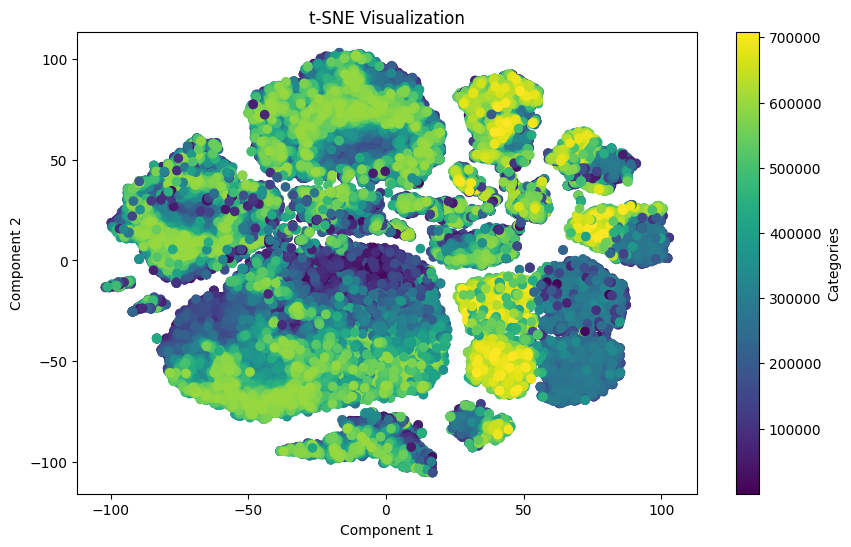

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Read the data using pandas
print("Reading data from:", file_path)
df = pd.read_csv(file_path)

# Handle missing values (if any)
print("Handling missing values...")
df = df.dropna()  # Drops rows with missing values

# Select numerical features for dimensionality reduction
print("Selecting numerical features for t-SNE...")
features = df.select_dtypes(include=['float64', 'int64'])  # Selects numeric columns

# Standardize features for better performance in t-SNE
print("Standardizing features...")
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Performs standardization

# Apply t-SNE for dimensionality reduction
print("Performing t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_results = tsne.fit_transform(features_scaled)  # Reduces dimensions to 2

# Create a scatter plot for visualization
print("Creating t-SNE visualization...")
plt.figure(figsize=(10, 6))  # Sets figure size
scatter = plt.scatter(
    tsne_results[:, 0], tsne_results[:, 1], c=df.iloc[:, 0], cmap='viridis'
)
plt.colorbar(scatter, label='Categories')
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
  x_unlab_encoded = encoder.predict(x_unlab)
  _, y_unlab_hat = predictor(x_unlab_encoded, training=False)
  y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
  return y_unlab_pred
'''
performance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset
generate tsne for this new dataset
'''

'\nperformance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset\ngenerate tsne for this new dataset\n'

In [ ]:
!pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps  # Import for the updated colormap handling
from tensorflow.keras.models import load_model

# Define function to generate predictions for unlabeled data
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    x_unlab_encoded = encoder.predict(x_unlab)  # Encode unlabeled data
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)  # Predict with classifier
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)  # Get predicted class labels
    return y_unlab_pred

# Define the function for t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

# Define Gradio function to process and visualize
def process_and_visualize(start_row, end_row):
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    Takes a range of rows as input from the user.
    """
    # Ensure x_unlabeled is preloaded
    global x_unlabeled

    # Convert input to integers
    start_row = int(start_row)
    end_row = int(end_row)

    # Select rows from x_unlabeled based on the provided range
    x_unlabeled_subset = x_unlabeled[start_row:end_row]

    # Ensure model and encoder are preloaded
    encoder = load_model(encoder_path)  # Load pre-trained encoder
    predictor = trained_model  # Assume predictor is already trained

    # Generate predictions
    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, predictor)

    # Create t-SNE visualization
    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
inputs = [
    gr.Number(label="Start Row", value=3, precision=0),  # Input for the starting row
    gr.Number(label="End Row", value=109, precision=0)   # Input for the ending row
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,  # Use the range inputs
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Automatically processes the `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/11/28 11:42:55 [W] [service.go:132] login to server failed: session shutdown


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> None
Killing tunnel 127.0.0.1:7862 <> None
Killing tunnel 127.0.0.1:7863 <> None
Killing tunnel 127.0.0.1:7864 <> None


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.5 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import load_model


def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    x_unlab_encoded = encoder.predict(x_unlab)
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)
    tsne_result = np.array(tsne_result)  # Convert to NumPy array for plotting

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = ListedColormap(plt.cm.tab10.colors[:len(unique_labels)])
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

def process_and_visualize(start_row, end_row):
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    Takes a range of rows as input from the user.
    """
    global x_unlabeled, trained_model

    start_row = int(start_row)
    end_row = int(end_row)

    x_unlabeled_subset = x_unlabeled[start_row:end_row]

    # Load encoder and predictor model
    encoder = load_model(encoder_path)

    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, trained_model)

    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

inputs = [
    gr.Number(label="Start Row", value=3, precision=0),
    gr.Number(label="End Row", value=109, precision=0)
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Automatically processes the `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/11/28 11:48:09 [W] [service.go:132] login to server failed: session shutdown


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> None
